In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("US_Crime_DataSet.csv")

/var/folders/7d/57z_mx2n1qs9p9s3y806bc4h0000gq/T/ipykernel_75815/1033594911.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("US_Crime_DataSet.csv")


In [3]:
#Renaming columns

df.columns = [col.strip().replace(" ", "_").replace(".", "").lower() for col in df.columns]
df.columns

Index(['record_id', 'agency_code', 'agency_name', 'agency_type', 'city',
       'state', 'year', 'month', 'incident', 'crime_type', 'crime_solved',
       'victim_sex', 'victim_age', 'victim_race', 'victim_ethnicity',
       'perpetrator_sex', 'perpetrator_age', 'perpetrator_race',
       'perpetrator_ethnicity', 'relationship', 'weapon', 'victim_count',
       'perpetrator_count', 'record_source'],
      dtype='object')

In [4]:
#Dropping unnecessary columns

df = df.drop(columns=["agency_code", "agency_name", "victim_ethnicity", "perpetrator_ethnicity", "incident", "perpetrator_count"], axis = 1)

In [5]:
#Resetting index

df.set_index('record_id', inplace = True)

In [22]:
df["perpetrator_age"].value_counts()

perpetrator_age
0     211079
20     21158
19     19807
21     18509
18     18477
       ...  
9          1
88         1
89         1
95         1
1          1
Name: count, Length: 191, dtype: int64

In [24]:
#Modes that may be used for hypothesis purposes

victim_age_mode = df["victim_age"].mode().iloc[0]
victim_sex_mode = df["victim_sex"].mode().iloc[0]
victim_race_mode = df["victim_race"].mode().iloc[0]

print(f"victim age mode: {victim_age_mode}")
print(f"victim sex mode: {victim_sex_mode}")
print(f"victim race mode: {victim_race_mode}")

month_mode = df["month"].mode().iloc[0]
print(f"month mode: {month_mode}")

perpetrator_sex_mode = df["perpetrator_sex"].mode().iloc[0]
perpetrator_race_mode = df["perpetrator_race"].mode().iloc[0]

print(f"perpetrator sex mode: {perpetrator_sex_mode}")
print(f"perpetrator race mode: {perpetrator_race_mode}")

victim age mode: 22
victim sex mode: Male
victim race mode: White
month mode: July
perpetrator sex mode: Male
perpetrator race mode: White


In [8]:
# Calculate the total number of crimes 
total_crimes = df.shape[0]
print(f"Total number of crimes: {total_crimes}")

# Calculate the total number of victims 
total_crimes_as_victims = df['victim_count'].sum()
print(f"Total number of victims involved in crimes: {total_crimes_as_victims}")

Total number of crimes: 638454
Total number of victims involved in crimes: 78743


In [9]:
# Total number of crimes by state
crime_counts_by_state = df.groupby("state").size().reset_index(name="total_crimes")

# Calculating the city with the highest crimes in each state
def city_with_highest_crimes(state_df):
    city_crime_counts = state_df.groupby("city").size().reset_index(name="city_crime_count")
    return city_crime_counts.loc[city_crime_counts['city_crime_count'].idxmax(), "city"]

df_state_city = df.groupby("state").apply(city_with_highest_crimes).reset_index(name="city_with_highest_crime")

# Merging the state crime counts with the highest crime city 
crime_counts_state_city = pd.merge(crime_counts_by_state, df_state_city, on="state")

# Top and least 5 states by total crime count
top5_crimes_by_state = crime_counts_state_city.sort_values(by='total_crimes', ascending=False).head(5)
least5_crimes_by_state = crime_counts_state_city.sort_values(by='total_crimes').head(5)

print("Top 5 states by total crime count with corresponding city:")
display(top5_crimes_by_state)

print("Least 5 states by total crime count with corresponding city:")
display(least5_crimes_by_state)

Top 5 states by total crime count with corresponding city:


/var/folders/7d/57z_mx2n1qs9p9s3y806bc4h0000gq/T/ipykernel_75815/1936807555.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_state_city = df.groupby("state").apply(city_with_highest_crimes).reset_index(name="city_with_highest_crime")


,state,total_crimes,city_with_highest_crime
4,California,99783,Los Angeles
43,Texas,62095,Harris
32,New York,49268,New York
9,Florida,37164,Dade
22,Michigan,28448,Wayne


Least 5 states by total crime count with corresponding city:


,state,total_crimes,city_with_highest_crime
34,North Dakota,308,Burleigh
45,Vermont,412,Washington
41,South Dakota,442,Pennington
26,Montana,601,Yellowstone
50,Wyoming,630,Natrona


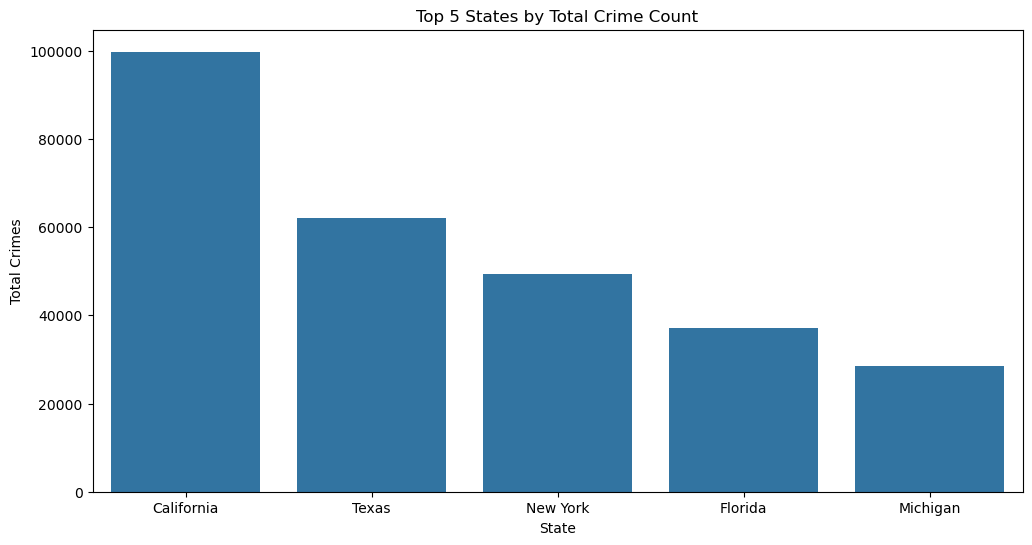

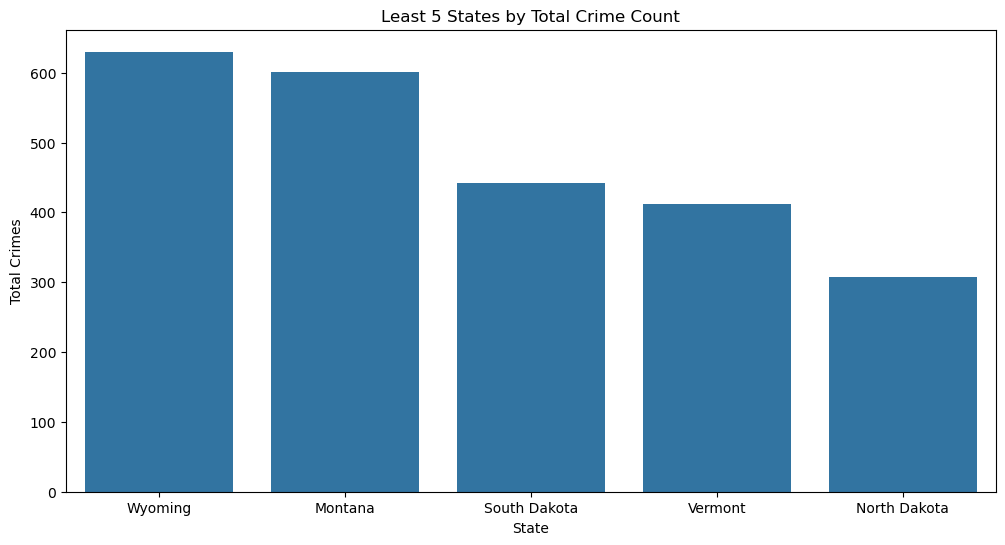

In [10]:
# Bar chart for top 5 and least 5 states and cities 

def plot_crime_data(crime_data, title):
    crime_data_sorted = crime_data.sort_values(by='total_crimes', ascending=False) 
    plt.figure(figsize=(12, 6))
    sns.barplot(x='state', y='total_crimes', data=crime_data_sorted, dodge=False)
    plt.title(title)
    plt.xlabel('State')
    plt.ylabel('Total Crimes')
    plt.show()

# Plot for top 5 states by total crime count
plot_crime_data(top5_crimes_by_state, 'Top 5 States by Total Crime Count')

# Plot for least 5 states by total crime count
plot_crime_data(least5_crimes_by_state, 'Least 5 States by Total Crime Count')

In [26]:
# List of states with the death penalty

death_penalty_states = ['California', 'Florida', 'Texas', "South Dakota", "Montana", "Wyoming"]

# Adding death penalty status to the dataset

crime_counts_state_city['death_penalty'] = crime_counts_state_city['state'].apply(
    lambda x: 'Yes' if x in death_penalty_states else 'No'
)
death_penalty_mapping = {'Yes': 1, 'No': 0}
top5_crimes_by_state['death_penalty_num'] = crime_counts_state_city['death_penalty'].map(death_penalty_mapping)
least5_crimes_by_state['death_penalty_num'] = crime_counts_state_city['death_penalty'].map(death_penalty_mapping)

display(top5_crimes_by_state)
display(least5_crimes_by_state)

,state,total_crimes,city_with_highest_crime,death_penalty_num
4,California,99783,Los Angeles,1
43,Texas,62095,Harris,1
32,New York,49268,New York,0
9,Florida,37164,Dade,1
22,Michigan,28448,Wayne,0


,state,total_crimes,city_with_highest_crime,death_penalty_num
34,North Dakota,308,Burleigh,0
45,Vermont,412,Washington,0
41,South Dakota,442,Pennington,1
26,Montana,601,Yellowstone,1
50,Wyoming,630,Natrona,1


In [12]:
#Crime Solved rate

total_crimes = df.shape[0]
solved_crimes = df[df['crime_solved'] == 'Yes'].shape[0]
crime_solved_rate = (solved_crimes / total_crimes) * 100

print(f"Crime Solved Rate: {crime_solved_rate:.2f}%")

Crime Solved Rate: 70.20%


In [13]:
#Crimes per year top 5
crimes_per_year = df.groupby('year')['crime_type'].count()
top_5_years = crimes_per_year.sort_values(ascending=False).head(5)
top_5_years

year
1993    24335
1992    23793
1994    23246
1980    23092
1991    22657
Name: crime_type, dtype: int64

In [14]:
# Creating a DataFrame for total crimes and solved crimes by agency
solved_crimes = df[df["crime_solved"] == "Yes"]
total_crimes_by_agency = df.groupby('agency_type')['crime_type'].count().reset_index(name='total_crimes')
solved_crimes_by_agency = solved_crimes.groupby('agency_type')['crime_type'].count().reset_index(name='solved_crimes')
agency_efficiency = pd.merge(total_crimes_by_agency, solved_crimes_by_agency, on='agency_type', how='left')

# Calculate unsolved crimes and crime solved ratio
agency_efficiency['unsolved_crimes'] = agency_efficiency['total_crimes'] - agency_efficiency['solved_crimes']
agency_efficiency["crime_solved_ratio"] = ((agency_efficiency['solved_crimes'] / agency_efficiency['total_crimes']) * 100).round(1).astype(str) + "%"
agency_efficiency = agency_efficiency.sort_values(by="crime_solved_ratio", ascending=True)

# Displaying the DataFrame
display(agency_efficiency)

,agency_type,total_crimes,solved_crimes,unsolved_crimes,crime_solved_ratio
0,County Police,22693,15160,7533,66.8%
1,Municipal Police,493026,336009,157017,68.2%
4,Special Police,2889,2058,831,71.2%
3,Sheriff,105322,82994,22328,78.8%
2,Regional Police,235,186,49,79.1%
5,State Police,14235,11715,2520,82.3%
6,Tribal Police,54,50,4,92.6%


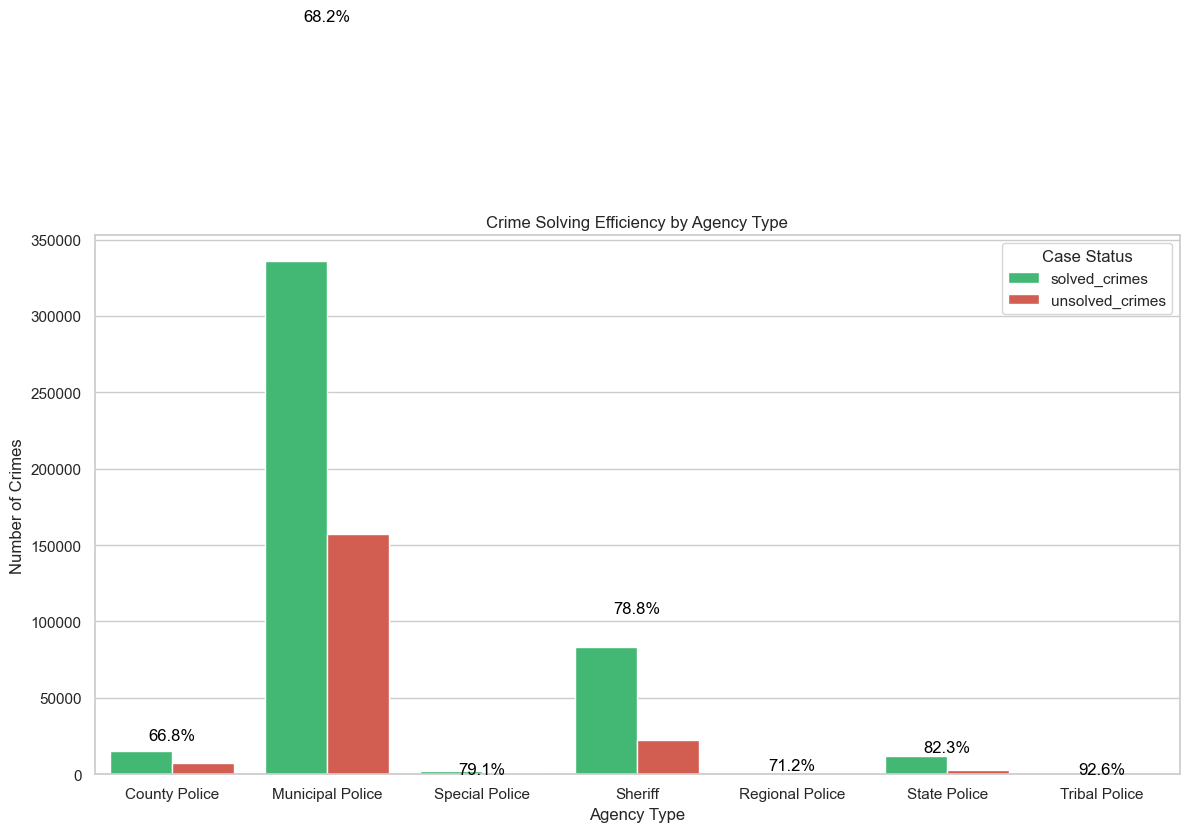

In [15]:
# Prepare the data in long format for plotting
agency_efficiency_long = pd.melt(agency_efficiency, id_vars=['agency_type'], value_vars=['solved_crimes', 'unsolved_crimes'], var_name='case_status', value_name='count')

# Plotting the stacked bar chart
plt.figure(figsize=(14, 7))
sns.set_theme(style="whitegrid")

# Plot total crimes by agency type (excluding unsolved crimes for clarity)
ax = sns.barplot(data=agency_efficiency_long, x='agency_type', y='count', hue='case_status', palette=['#2ecc71', '#e74c3c'])

# Adding labels and title
plt.xlabel('Agency Type')
plt.ylabel('Number of Crimes')
plt.title('Crime Solving Efficiency by Agency Type')
plt.legend(title='Case Status', loc='upper right')

# Annotate bars with the solved crime ratio
for idx, row in agency_efficiency.iterrows():
    plt.text(idx, row.total_crimes + 0.5, f"{row['crime_solved_ratio']}", color='black', ha="center")

plt.show()

In [16]:
# Relationships between victim and perpetrator
relationship_counts = df['relationship'].value_counts()
relationship_percentage = (relationship_counts / len(df['relationship'])) * 100
relationship_percentage = relationship_percentage.map('{:.2f}%'.format)
relationship_summary = pd.DataFrame({
    'count': relationship_counts,
    'percentage': relationship_percentage})
relationship_summary = relationship_summary.sort_values(by='count', ascending=False)

relationships_summary=relationship_summary.head(4)
relationships_summary

,count,percentage
relationship,,
Unknown,273013,42.76%
Acquaintance,126018,19.74%
Stranger,96593,15.13%
Wife,23187,3.63%


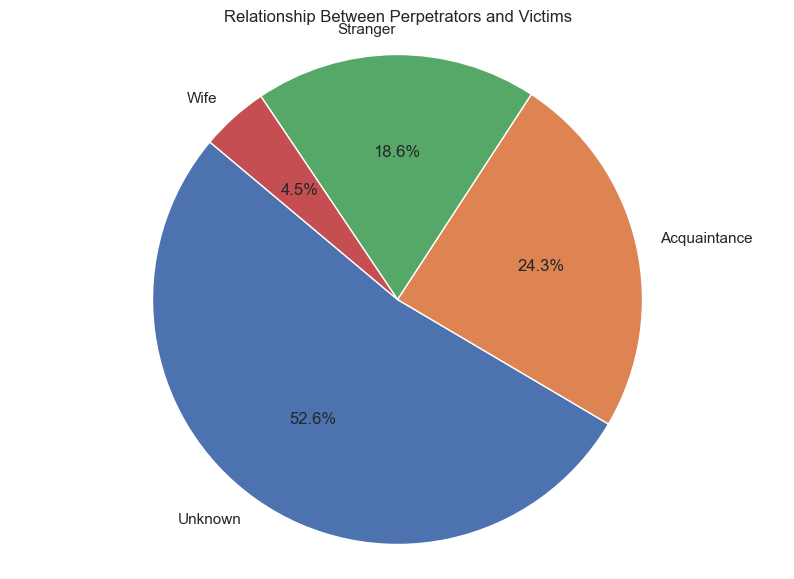

In [17]:
# Plotting the pie chart for relationships analysis
plt.figure(figsize=(10, 7))
labels = relationships_summary.index
sizes = relationships_summary['count']
percentages = relationships_summary['percentage']

#Pie chart description
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Relationship Between Perpetrators and Victims')
plt.axis('equal')

plt.show()

In [18]:
# Filter the dataset for the top 5 states in 2023
df_2013 = df[df['year'] == 2013]
top_5_states = ['California', 'Texas', 'New York', 'Florida', 'Michigan']

df_2013_top_5_states = df_2013[df_2013['state'].isin(top_5_states)]
total_crimes_top_5_states_2013 = df_2013_top_5_states.groupby('state').size().reset_index(name='total_crimes')

print("Total number of crimes for each of the top 5 states in 2013:")
display(total_crimes_top_5_states_2013)

Total number of crimes for each of the top 5 states in 2013:


,state,total_crimes
0,California,1930
1,Florida,1129
2,Michigan,645
3,New York,651
4,Texas,1272
